# Lab 3: Clustering and Manifold Learning

### A. Import Python Modules and Dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Load the dataset

In [299]:
df = pd.read_csv("https://raw.githubusercontent.com/mandricic/CS5062/master/loans_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 17)


### Scatterplot Function (to be used below for visualising a clustering) 

In [0]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

Number of clusters $k$.

In [0]:
k = 2

#### Run k-Means

In [0]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### E. Apply a manifold-learning technique to project the data set to a 2D space


In [0]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [305]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

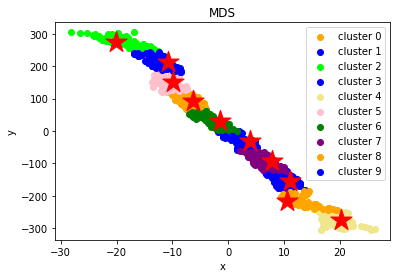

In [306]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS') 

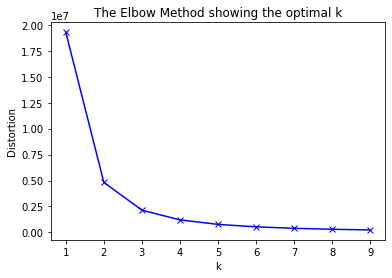

In [313]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel =  KMeans(n_clusters=k, init ='k-means++',  max_iter=300).fit(data)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
#According to the Elbow graph we deterrmine the clusters number as #2. Applying k-means algorithm to the dataset.
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(data)

In [315]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2') 


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

IndexError: ignored

### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [0]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [184]:
df.head()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0,0.000000,1.084523,1.058140,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.841086,0
1,1,0.333333,0.925883,1.047319,0.75,1.0,1,0,1,0,0,0,0,0,0,0,0.871711,0
2,2,0.000000,0.683858,0.635920,0.75,1.0,1,0,1,0,1,0,0,0,1,1,0.385189,0
3,3,0.000000,0.608992,1.002824,0.75,1.0,1,0,1,0,0,0,1,0,1,1,0.717012,0
4,4,0.000000,1.101869,1.115650,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.860305,0


In [0]:
df.tail()

#### Compute the mean value of each attribute for each cluster

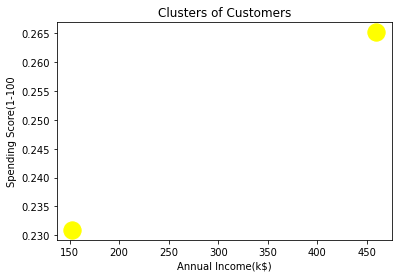

In [261]:
plt.scatter(clustered_data_sklearn.cluster_centers_[:, 0], clustered_data_sklearn.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

In [224]:
df.groupby('cluster').mean()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,,
0,307.0,0.243902,0.913029,1.075263,0.718902,0.873171,0.765854,0.009756,0.600000,0.004878,0.121951,0.053659,0.195122,0.351220,0.331707,0.712195,0.837172
1,102.0,0.232520,0.921988,1.068543,0.713415,0.858537,0.834146,0.019512,0.682927,0.004878,0.121951,0.053659,0.204878,0.395122,0.390244,0.668293,0.875646
2,511.5,0.267974,0.914740,1.084904,0.707721,0.833333,0.789216,0.034314,0.661765,0.004902,0.156863,0.049020,0.254902,0.392157,0.264706,0.681373,0.875301


Conclusion
From the table above, I can see that:

Cluster 2  Have lowest value for Loan Amount and have  Hight enough Credit_History. 
Cluster 0  Contains very low Credit_History and Hight enough ApplicationIncome and Loan Amount. 
Cluster 3 Have highest Loan Amount and Credit History
 
     
_Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order._